In [0]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# ***Mounting GDrive***

In [63]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [64]:
path = '/gdrive/My Drive/EVA4/'
!ls '/gdrive/My Drive/EVA4/'

 A11.py					     lrfinder.py
 dataloaders.py				     LR_Range_Test.py
 Dogs_CocoJson.json			     modelstats.py
'Dogs JSON Coco Annotated Description.jpg'   modeltrainer.py
 Dogs_Json_Coco.json			     plots.py
 eva4net.py				     plots.py.gdoc
 evadatatransforms.py			     __pycache__
 gradcam.py				     resnetmodel.py


# ***Loading JSON File (COCO JSON File)***




In [0]:
import json
with open(path + "Dogs_Json_Coco.json") as f:
  annotations_data = json.load(f)

# ***Dogs JSON COCO File Description Sample***

![alt text](https://drive.google.com/uc?id=1KmiWtoVD1vqyyZ-OvMkwGwp4f-z-KZj8)
[Dogs JSON COCO File Description Sample](https://drive.google.com/open?id=1N10ImjUeOuHbSdhDWwvxeqilzGnitWpz)

# ***Extracting Keys from JSON File***








In [66]:
print(annotations_data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


# Extracting Image Attributes from the JSON ***File***

In [67]:
images = pd.DataFrame(annotations_data['images'], columns = annotations_data['images'][0].keys())
images.head()

,id,width,height,file_name,license,date_captured
0,0,400,500,D1.jpg,1,
1,1,500,333,D2.jpg,1,
2,2,500,333,D3.jpg,1,
3,3,500,375,D4.jpg,1,
4,4,500,375,D5.jpg,1,


# Removing Unnecessary Attributes from Image ***Attributes***

In [68]:
images = images.drop(["id", "license","date_captured"],axis = 1)
images.head()

,width,height,file_name
0,400,500,D1.jpg
1,500,333,D2.jpg
2,500,333,D3.jpg
3,500,375,D4.jpg
4,500,375,D5.jpg


# ***Extracting Annotated Image Attributes from the JSON File***

In [69]:
annotations = pd.DataFrame(annotations_data['annotations'], columns = annotations_data['annotations'][0].keys())
annotations.head()

,id,image_id,segmentation,area,bbox,iscrowd
0,0,0,"[114, 44, 378, 44, 378, 488, 114, 488]",117216,"[114, 44, 264, 444]",0
1,1,1,"[178, 51, 346, 51, 346, 197, 178, 197]",24528,"[178, 51, 168, 146]",0
2,2,2,"[149, 22, 422, 22, 422, 318, 149, 318]",80808,"[149, 22, 273, 296]",0
3,3,3,"[177, 106, 394, 106, 394, 339, 177, 339]",50561,"[177, 106, 217, 233]",0
4,4,4,"[8, 84, 449, 84, 449, 347, 8, 347]",115983,"[8, 84, 441, 263]",0


# ***Removing Unnecessary Attributes from Annotated Image Attributes from the JSON File***

In [70]:
bbwidth = []
bbheight = []
bbox = list(annotations['bbox'])
for i in bbox:
    bbwidth.append(i[2])
    bbheight.append(i[3])
annotations['bbwidth'] = bbwidth
annotations['bbheight'] = bbheight
annotations = annotations.drop(["bbox", "id","segmentation","area","iscrowd"],axis =1)
annotations.head()

,image_id,bbwidth,bbheight
0,0,264,444
1,1,168,146
2,2,273,296
3,3,217,233
4,4,441,263


# ***Combining the Image and Annotated Image Attributes***

In [71]:
image_info = pd.concat([images,annotations],axis = 1)

columnsTitles = ['image_id', 'file_name', 'bbwidth','bbheight','width','height']
image_info = image_info.reindex(columns=columnsTitles)

image_info.head()

,image_id,file_name,bbwidth,bbheight,width,height
0,0,D1.jpg,264,444,400.0,500.0
1,1,D2.jpg,168,146,500.0,333.0
2,2,D3.jpg,273,296,500.0,333.0
3,3,D4.jpg,217,233,500.0,375.0
4,4,D5.jpg,441,263,500.0,375.0


# ***Normalising the Image (Height and Width to 1)***

In [72]:
image_info['bbwidth'] = image_info['bbwidth'].div(image_info['width'])
image_info['bbheight'] = image_info['bbheight'].div(image_info['height'])
image_info['height'] = image_info['height'].div(image_info['height'])
image_info['width'] = image_info['width'].div(image_info['width'])

image_info.head()

,image_id,file_name,bbwidth,bbheight,width,height
0,0,D1.jpg,0.660,0.888000,1.0,1.0
1,1,D2.jpg,0.336,0.438438,1.0,1.0
2,2,D3.jpg,0.546,0.888889,1.0,1.0
3,3,D4.jpg,0.434,0.621333,1.0,1.0
4,4,D5.jpg,0.882,0.701333,1.0,1.0


# ***Dropping Unnecessary Values(NAN) from the Normalised Image Values***

In [73]:
image_info_final = image_info.drop(["width","height","file_name"],axis = 1)
image_info_final = image_info_final.apply (pd.to_numeric, errors='coerce')
image_info_final = image_info_final.dropna()
image_info_final

,image_id,bbwidth,bbheight
0,0,0.660000,0.888000
1,1,0.336000,0.438438
2,2,0.546000,0.888889
3,3,0.434000,0.621333
4,4,0.882000,0.701333
5,5,0.937656,0.920110
6,6,0.653846,0.900000
7,7,0.292000,0.370667
8,7,0.483333,0.817664
9,8,1.093525,1.270073


# ***Plotting the Image Values with Bounding Box Height and Width***

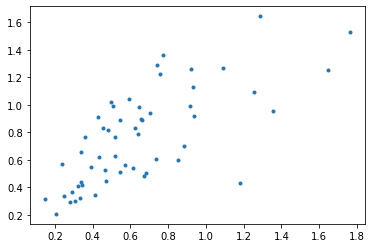

In [74]:
import matplotlib.pyplot as plt
plt.plot(image_info_final['bbwidth'],image_info_final['bbheight'],'.')

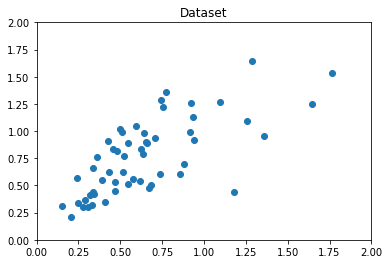

In [75]:
plt.plot() 
plt.xlim([0, 2]) 
plt.ylim([0, 2]) 
plt.title('Dataset') 
plt.scatter(image_info_final['bbwidth'], image_info_final['bbheight']) 
plt.show()

In [0]:
X=image_info_final[['bbwidth','bbheight']].to_numpy()

# ***Intersection over Union***

In [0]:
import numpy as np

# given centroids find the maximum IOU of a bbox
def iou(box, centroids):
    x = np.minimum(np.exp(centroids[:, 0]), np.exp(box[0]))
    y = np.minimum(np.exp(centroids[:, 1]), np.exp(box[1]))

    intersection = x * y
    box_area = np.exp(box[0]) * np.exp(box[1])
    centroid_area = np.exp(centroids[:, 0]) * np.exp(centroids[:, 1])

    iou_ = intersection / (box_area + centroid_area - intersection)
    #return iou_
    return (np.max(iou_), np.argmax(iou_))

# ***Elbow Method***

In [0]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
centroids = {}
memberships = {}
miou = []
K = range(1,21) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_
    centroids[k] = kmeanModel.cluster_centers_
    maxiou = np.array([iou(b, centroids[k])  for b in X])
    memberships[k] = maxiou[:, 1].astype(np.uint8)
    # find mean of maximum IOU between bounding boxes and individual anchors
    miou.append(np.mean(maxiou[:, 0]))

# ***Elbow Method using Distortion***

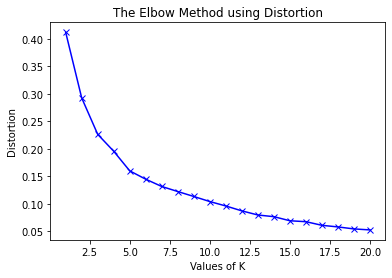

In [79]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

# ***Elbow Method using Inertia***

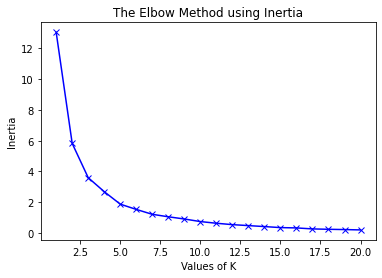

In [80]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

# ***Elbow Method to Determine Optimal K (No. of Clusters)***

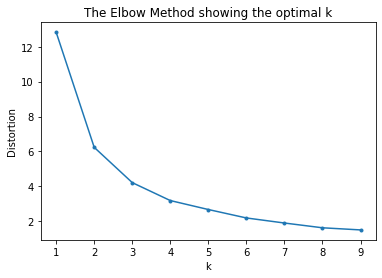

In [81]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(image_info_final)
    kmeanModel.fit(image_info_final)
    distortions.append(sum(np.min(cdist(image_info_final, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /image_info_final.shape[0])

# Plot the elbow
plt.plot(K, distortions, '.-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
import seaborn as sns
def plotclusters(k):
  #ax = image_info_final.plot.scatter('log_width', 'log_height', c=f'cluster{k}', colormap='viridis')
  ax = sns.scatterplot('bbwidth', 'bbheight', data=image_info_final, hue=memberships[k], style = memberships[k], palette="Set2")
  ax.scatter(centroids[k][:,0], centroids[k][:,1], marker='*', c='black')
  plt.show()

# ***Plotting Clusters for K = 3,4,5,6,7,8***

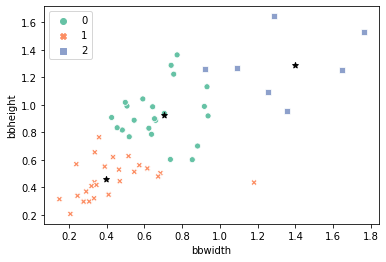

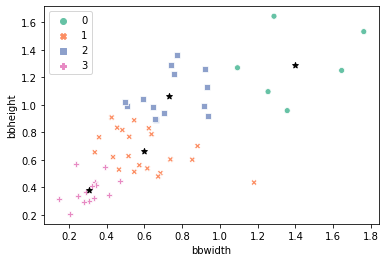

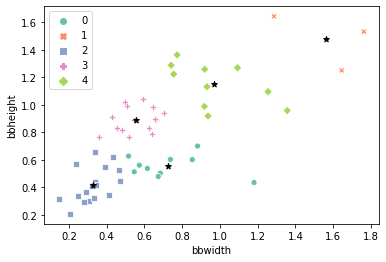

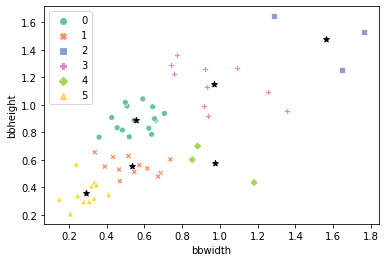

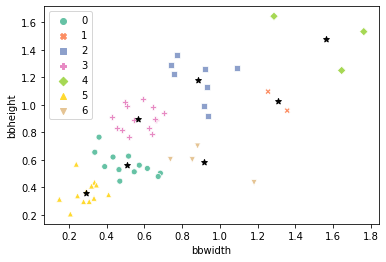

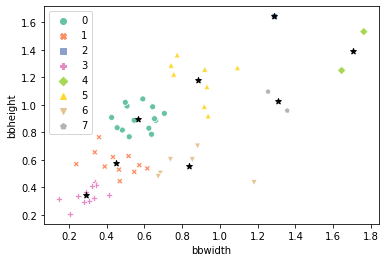

In [83]:
for k in [3, 4, 5, 6,7,8]:
  plotclusters(k)

In [84]:
!pip install pyclustering

# ***Using Distance Metric of IoU***

In [0]:
# given centroids find the maximum IOU of a bbox
def ioudist(box, centroid):
    #print(centroid)
    x = np.minimum(np.exp(centroid[0]), np.exp(box[0]))
    y = np.minimum(np.exp(centroid[1]), np.exp(box[1]))

    intersection = x * y
    box_area = np.exp(box[0]) * np.exp(box[1])
    centroid_area = np.exp(centroid[0]) * np.exp(centroid[1])

    iou_ = intersection / (box_area + centroid_area - intersection)
    return 1 - iou_

In [0]:
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric

metric = distance_metric(type_metric.USER_DEFINED, func=ioudist)
clusters = []
final_centers = []
mean_iou = []
for k in K:
  # Prepare initial centers using K-Means++ method.
  initial_centers = kmeans_plusplus_initializer(X, k).initialize()

  if k==1:
    kmeans_instance = kmeans(X, initial_centers)  
  else:
    kmeans_instance = kmeans(X, initial_centers, metric=metric)

  kmeans_instance.process()
  clusters.append(kmeans_instance.get_clusters())
  c = np.array(kmeans_instance.get_centers())
  final_centers.append(c)
  maxiou = np.array([iou(b, c)  for b in X])
  mean_iou.append(np.mean(maxiou[:, 0]))

Visualising 

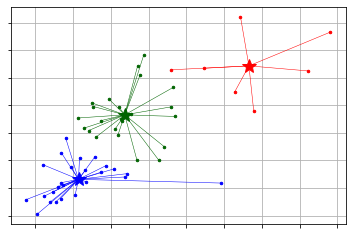

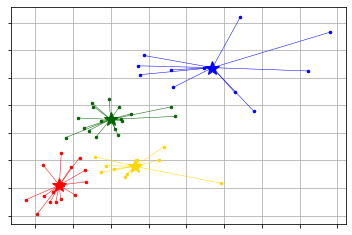

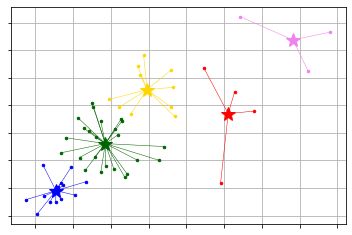

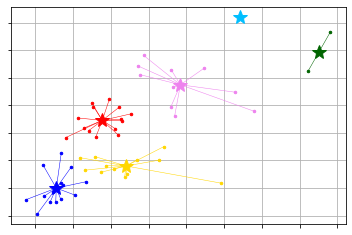

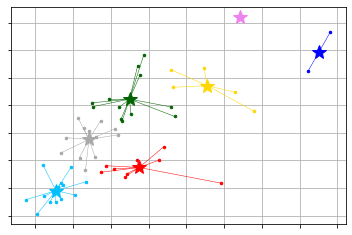

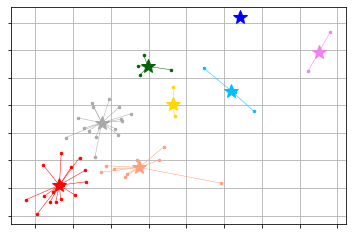

In [87]:
for k in range(2, 8):
  kmeans_visualizer.show_clusters(X, clusters[k], final_centers[k])

# ***Plotting the Data Points of Images for K = 3 (using Elbow Method)***

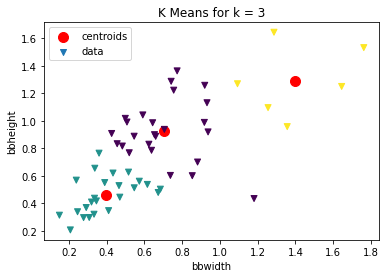

In [88]:
cl3 = KMeans(3)
cl3.fit(X)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(image_info_final['bbwidth']), list(image_info_final['bbheight']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bbwidth')
plt.ylabel('bbheight')
plt.title('K Means for k = 3')
plt.legend()
plt.show()

# ***Plotting the Data Points of Images for K = 4 (Mean IoU)***

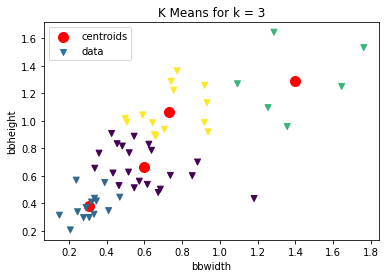

In [89]:
cl3 = KMeans(4)
cl3.fit(X)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(image_info_final['bbwidth']), list(image_info_final['bbheight']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bbwidth')
plt.ylabel('bbheight')
plt.title('K Means for k = 3')
plt.legend()
plt.show()

***Observations : It is observed the Optimal Number of Clusters would be either 3 or 4***

***Submitted by G Uday Kiran, V Srilakshmi***